In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
# from scipy import stats
# from scipy.interpolate import interp1d

In [9]:
y_train = pd.read_csv('y_train.csv')

In [13]:
y_train.shape # 2503 data points

(2503, 1)

In [14]:
y_train.head()

,y_train
0,14569
1,1963680
2,1615584
3,15365
4,159505


### Most of the data is concentrated in the left-most bins

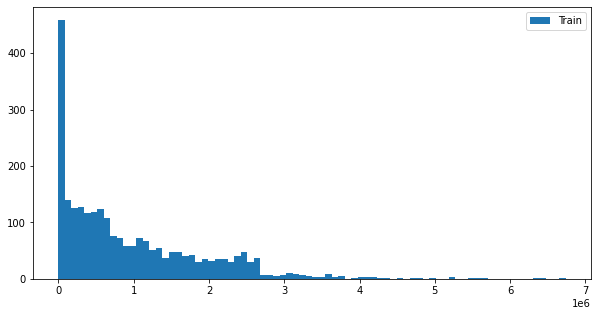

In [19]:
res = "s"
if res == 'd':
    bins = np.arange(0,y_train.values.max()+1, 1)
elif res == 'h':
    bins = np.arange(0,y_train.values.max()+24, 24)
elif res == 's':
    bins = np.arange(0,y_train.values.max()+86400, 86400)
    
plt.figure(figsize=(10,5))
plt.hist(y_train.values, bins = bins);
plt.legend()
plt.show()

### I tried multiple transformations.. but did not work

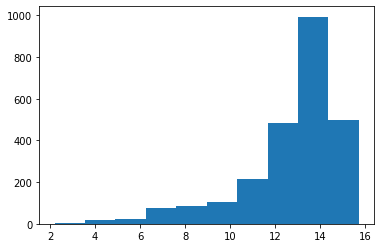

In [24]:
t1 = np.log(np.array(y_train))
plt.hist(t1);

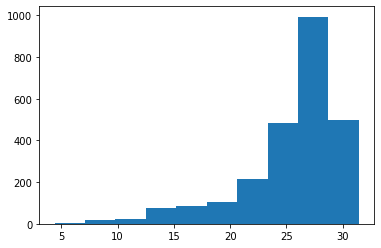

In [23]:
t2 = np.log(np.array(y_train)**2)
plt.hist(t2);

### This CDF and its inverse worked 

In [30]:
t3 = []
for p in data:
    temp = (np.array(y_train)<=p).astype(np.int32)
    t3.append(temp.sum()/len(y_train))

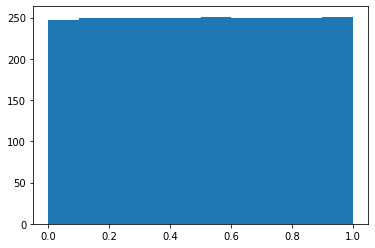

In [31]:
plt.hist(t3);

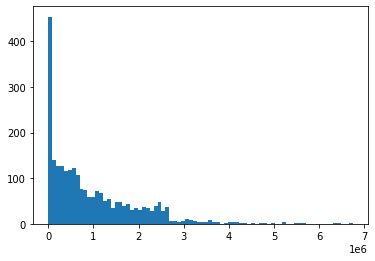

In [36]:
inv = []
for p in t3:
    inv.append(np.quantile(y_train, p))
plt.hist(inv,bins=bins);